# Проект:  Принятие решений в бизнесе. Приоритезация гипотез и анализ результатов А/В теста 

# Описание проекта
**Контекст**

Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

# Описание данных

**Данные для первой части**


- Файл `/datasets/hypothesis.csv` 
    - Hypothesis — краткое описание гипотезы;
    - Reach — охват пользователей по 10-балльной шкале;
    - Impact — влияние на пользователей по 10-балльной шкале;
    - Confidence — уверенность в гипотезе по 10-балльной шкале;
    - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**
- Файл `/datasets/orders.csv`
    - transactionId — идентификатор заказа;
    - visitorId — идентификатор пользователя, совершившего заказ;
    - date — дата, когда был совершён заказ;
    - revenue — выручка заказа;
    - group — группа A/B-теста, в которую попал заказ.

- Файл `/datasets/visitors.csv`
    - date — дата;
    - group — группа A/B-теста;
    - visitors — количество пользователей в указанную дату в указанной группе A/B-теста


# Цель исследования

Приоритезировать гипотезы, проанализировать результаты A/B-теста и принять решение о дальнейших действиях по проведенному тесту для определения эффективных мер, направленных на увеличение выручки интернет-магазина 

# Ход исследования

1. Приоритизация гипотез:
    - Применение фреймворков ICE и RICE для приоритизации гипотез.
    - Сравнение результатов приоритизации по обоим фреймворкам и объяснение различий.
    

2. Анализ A/B-теста:
    - Построение и анализ графиков для кумулятивных метрик.
    - Определение и анализ аномальных данных.
    - Подсчет и интерпретация статистической значимости различий в показателях между группами как для "сырых", так и для "очищенных" данных.
    - Принятие решения по результатам теста.

In [5]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

## Часть 1. Приоритизация гипотез.

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [8]:
try :
    hypothesis = pd.read_csv('/Users/rika/Downloads/hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

pd.set_option('max_colwidth', 150) 

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)

ICE score = Impact * confidence * ease

**ICE score = Impact * confidence / effort**

In [10]:
hypothesis_ice = hypothesis.copy()
hypothesis_ice ['ICE'] = round((hypothesis_ice['Impact'] * 
                                hypothesis_ice['Confidence'] /
                                hypothesis_ice['Efforts']),2)

In [11]:
hypothesis_ice.sort_values(by ='ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Фреймворк RICE состоит из четырёх компонент:
 - Reach — скольких пользователей затронет изменение, которое вы хотите внести;
 - Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
 - Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
 - Efforts — сколько стоит протестировать эту гипотезу. 
 
**RICE score = Reach * Impact * Confidence / Efforts**

In [13]:
hypothesis_rice = hypothesis.copy()
hypothesis_rice ['RICE'] = round((hypothesis_rice['Reach']* 
                                  hypothesis_rice['Impact'] * 
                                  hypothesis_rice['Confidence'] /
                                  hypothesis_rice['Efforts']),2)

In [14]:
hypothesis_rice.sort_values(by ='RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.0


### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Изменения:**
 - Состав топа 5 приорететных гипотез остался без изменений, однако изменилась их приоритетность


- **Гипотеза 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок):**
     - В RICE занимает 1 место, так как данное изменение затронет больше половины пользователей  
     - Кроме того, с большой уверенностью сильно повлияет на пользователей имея средний уровень затрат (Efforts = 5) на тестирование, благодаря чему во фреймворке ICE находится на 3 месте по приоритетности
 
 
 - **Гипотеза 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа):**
     - В фреймворке RICE поднялась на 2 место, благодаря высокому Reach (8)
     - В фреймворке ICE находится на 5 месте приоритета поскольку несмотря на низкую стоимость тестирования (Efforts = 3) и высокий уровень уверенности (7), данная гипотеза не сильно повлияет на удовлетворение пользователей от продукта (Impact = 3)
 
 
 - **Гипотеза 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей):**
     - Находится на 2 и 3 месте по приоритетности во фреймворках ICE и RICE соотвественно за счет высокой уверенности в сильном влиянии на пользователей при средних затратах на реализацию (несмотря на то, что она затронетт относительно небольщую часть пользователей)
     

 - **Гипотеза 6 (Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию):**
     - Сохранила 4 место приоритета поскольку имеет средний уровень Reach фактора, что не повлияло на приоритетность в фреймворке RICE
     
     
 - **Гипотеза 8 (Запустить акцию, дающую скидку на товар в день рождения):**
     - Имеет самое значимое изменение приоритета: она опустилась с 1 места во фреймворке ICE на 5 место в RICE - поскольку повлияет на очень малую часть пользователей 
     

Для проведения А/В теста в первую очередь протестируем гипотезу 7 :

**"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"**, 
 
 так как данное изменение с большой уверенностью затронет больше половины пользователей и сильно повлияет на удовлетворенность пользователей при среднем уровне затрат

**Почему так произошло?**

При использовании RICE фреймворка учитывается параметр Reach, отражающий сколько пользователей затронет изменение. Он существенно влияет на итоговый ранг при приоритезации, так как гипотеза с высоким уровнем уверенности и влиянием на удовлетворенность может затронуть лишь малую часть пользовтаелей, что снижает ее приоритет 

## Часть 2. Анализ A/B-теста

В данном случае, для проведения A/B теста возьмём гипотезу 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", т.к. есть необходимая оценка и ресурсы для проведения

Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`

**Задача**

Проанализируйте A/B-тест:

- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.


In [22]:
# Загрузка данных
try :
    orders = pd.read_csv('/Users/rika/Downloads/orders.csv')
    visitors = pd.read_csv('/Users/rika/Downloads/visitors.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [23]:
ddfs = {'orders':orders,'visitors':visitors}

#Предобработка данных 
#Проверка соответствия типов данных
for name, df in ddfs.items():
    print ('Столбцы таблицы', name, 'хранят данные типа:')
    print (df.dtypes)
    print ()

Столбцы таблицы orders хранят данные типа:
transactionId     int64
visitorId         int64
date             object
revenue           int64
group            object
dtype: object

Столбцы таблицы visitors хранят данные типа:
date        object
group       object
visitors     int64
dtype: object



In [24]:
#Изменение типа данных в столбцах с датами 
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [25]:
#Предобработка данных 

for name, df in ddfs.items():
    duplic = df.duplicated().sum()
    print ('В таблице ', name, ', содержащей', df.shape[0],'строк и',df.shape[1] , 'столбцов, обнаружено', duplic, 'дубликатов')
    
print()

for name, df in ddfs.items():
    print('Количество пропусков в столбцах таблицы', name, ':')
    print(df.isna().sum())

В таблице  orders , содержащей 1197 строк и 5 столбцов, обнаружено 0 дубликатов
В таблице  visitors , содержащей 62 строк и 3 столбцов, обнаружено 0 дубликатов

Количество пропусков в столбцах таблицы orders :
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Количество пропусков в столбцах таблицы visitors :
date        0
group       0
visitors    0
dtype: int64


In [26]:
#Предобработка данных 
a = orders[orders['group'] == 'A']
b = orders[orders['group'] == 'B']

#проверяем что 1 пользователь не попал в 2 группы

merge = a.merge(b, on = 'visitorId', how = 'inner')

# исключаем заказы пользователей которые попали в обе группы

orders = orders.loc[~orders['visitorId'].isin(merge['visitorId'])]

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [28]:
#Группа А
orders_a = orders.loc[orders['group'] == 'A'].sort_values(by = 'date')
day_rev_a = orders_a.groupby('date').agg({'revenue':'sum',
                                          'transactionId':'nunique'}).reset_index()
day_rev_a = day_rev_a.merge(visitors.loc[visitors['group'] == 'A'], on = 'date')
day_rev_a['cum_rev'] = day_rev_a['revenue'].cumsum()
day_rev_a['cum_ord'] = day_rev_a['transactionId'].cumsum()
day_rev_a['cum_vis'] = day_rev_a['visitors'].cumsum()

#Группа B 
orders_b = orders.loc[orders['group'] == 'B'].sort_values(by = 'date')
day_rev_b = orders_b.groupby('date').agg({'revenue':'sum',
                                          'transactionId':'nunique'}).reset_index()
day_rev_b = day_rev_b.merge(visitors.loc[visitors['group'] == 'B'], on = 'date')
day_rev_b['cum_rev'] = day_rev_b['revenue'].cumsum()
day_rev_b['cum_ord'] = day_rev_b['transactionId'].cumsum()
day_rev_b['cum_vis'] = day_rev_b['visitors'].cumsum()

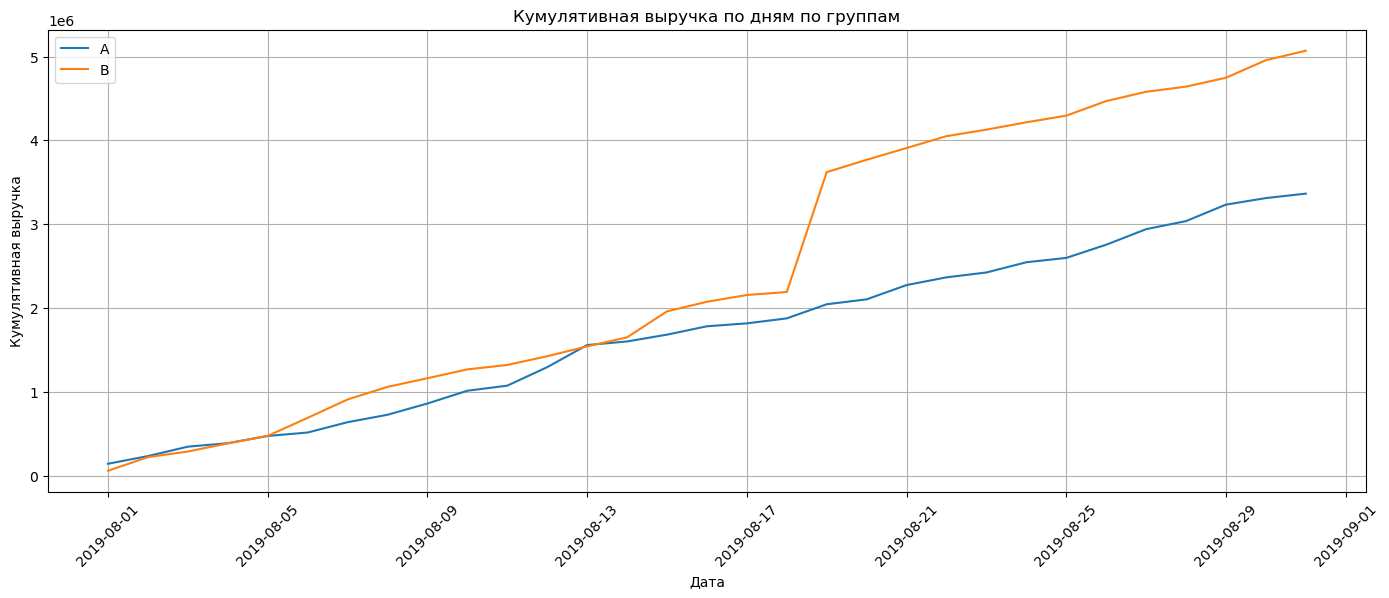

In [29]:
# Построение графика кумулятивной выручки
plt.figure(figsize=(17, 6))
plt.plot (day_rev_a['date'], day_rev_a['cum_rev'], label = 'A')
plt.plot (day_rev_b['date'], day_rev_b['cum_rev'], label = 'B')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Кумулятивная выручка')
plt.title('Кумулятивная выручка по дням по группам')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
day_rev_b.loc[day_rev_b['date'] =='2019-08-19']

,date,revenue,transactionId,group,visitors,cum_rev,cum_ord,cum_vis
18,2019-08-19,1429920,21,B,487,3620785,348,11658


In [31]:
day_rev_b.describe().round(2).T['mean'].reset_index()

,index,mean
0,date,2019-08-16 00:00:00
1,revenue,163515.23
2,transactionId,17.68
3,visitors,610.19
4,cum_rev,2493152.61
5,cum_ord,291.55
6,cum_vis,9906.19


In [32]:
1429920/190572.90

7.503270402035127

 - Обе группы показывают положительный тренд кумулятивной выручки
 - Группа B значительно опережает группу A по общей выручке по итогам теста
 - Резкий скачок  выручки группы В 2019-08-18. Выручка за этот день в 7,5 раз превышает среднюю выручку при среднем количестве заказов 

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.


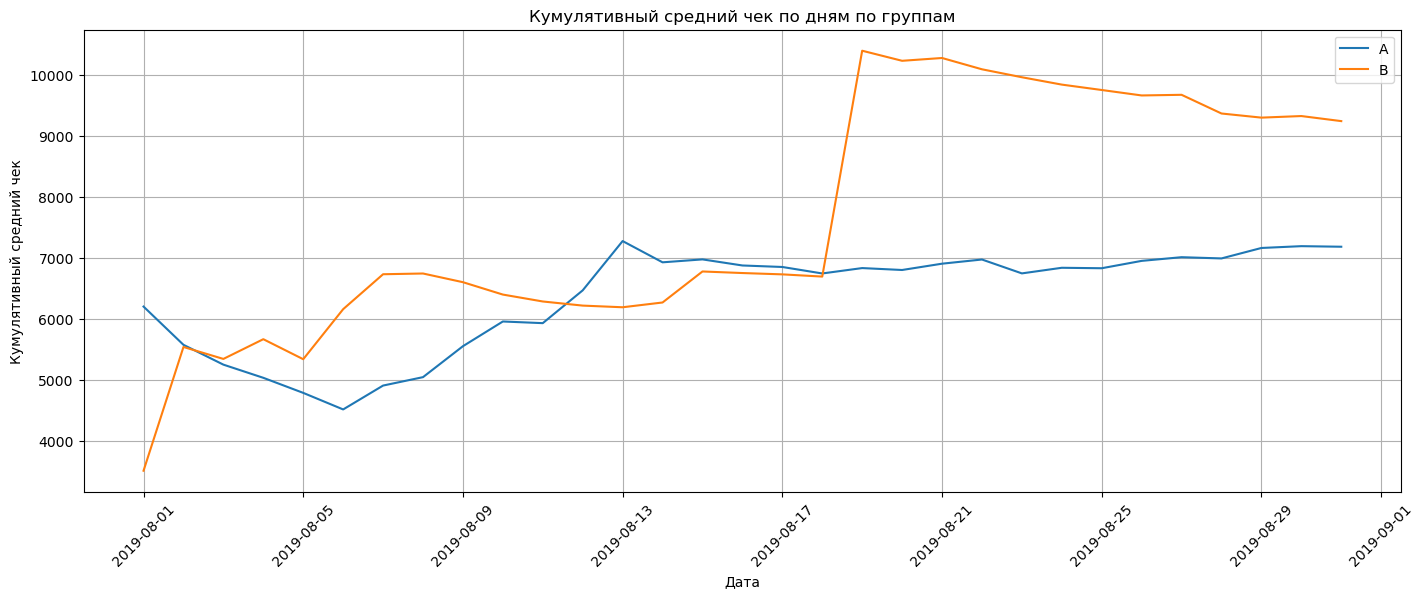

In [35]:
# Построение графика кумулятивного среднего чека
plt.figure(figsize=(17, 6))
plt.plot (day_rev_a['date'], day_rev_a['cum_rev']/day_rev_a['cum_ord'], label = 'A')
plt.plot (day_rev_b['date'], day_rev_b['cum_rev']/day_rev_b['cum_ord'], label = 'B')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Кумулятивный средний чек')
plt.title('Кумулятивный средний чек по дням по группам')
plt.legend()
plt.grid(True)
plt.show()

 - Динамика среднего чека нестабильно изменяется в начале проведения теста 
 - К концу теста видно, что средний чек стабилизировался: 
     - По группе А имеет нейтрально-растущую динамику 
     - По группе Б - снижение среднего чека в конце теса 
 - 2019-08-19 в группе Б был совершен нетипично большой заказ, что мешает делать корректный вывод о среднем чеке группы    

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.


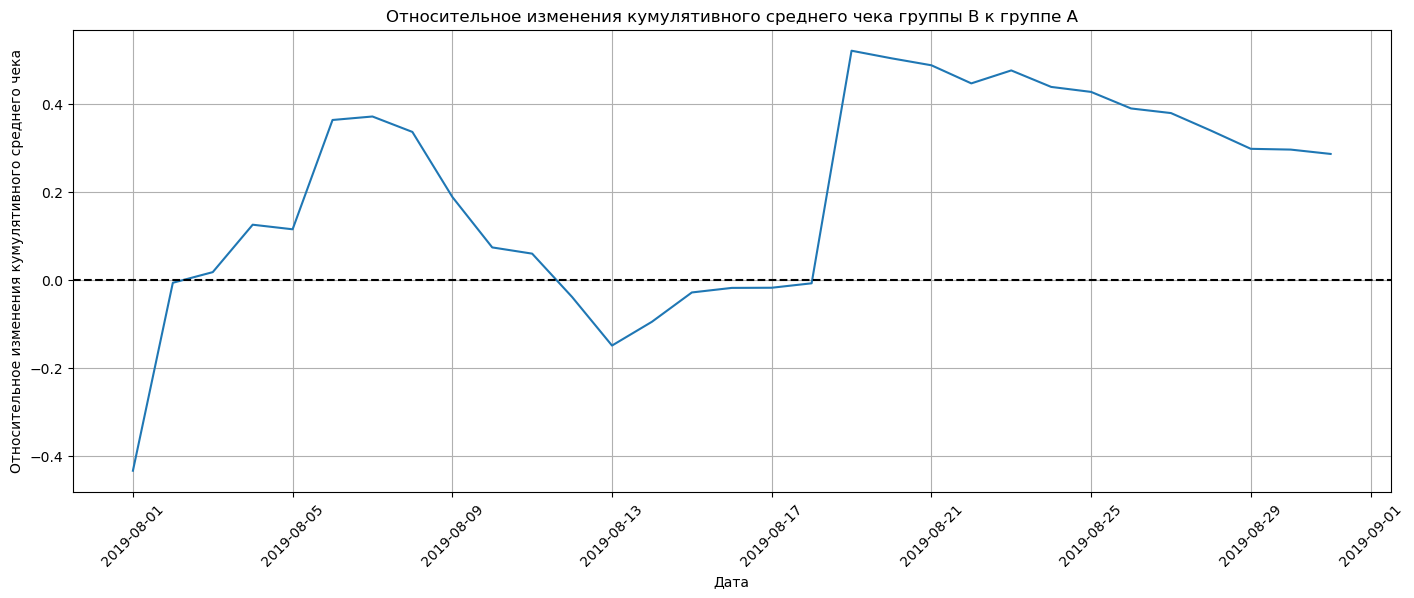

In [38]:
day_rev_b['cum_mean_bill'] = day_rev_b['cum_rev']/day_rev_b['cum_ord']
day_rev_a['cum_mean_bill'] = day_rev_a['cum_rev']/day_rev_a['cum_ord']

merged_day_rev = day_rev_a.merge(day_rev_b, on = 'date', suffixes=['_a', '_b'])

plt.figure(figsize=(17, 6))
plt.plot(merged_day_rev['date'], (day_rev_b['cum_mean_bill']/day_rev_a['cum_mean_bill']-1))

plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Относительное изменения кумулятивного среднего чека')
plt.title('Относительное изменения кумулятивного среднего чека группы B к группе A')
plt.grid(True)
plt.show()

 - График относительного изменения куммулятивного среднего чека группы Б к группе А имеет нестабильную динамику
 - По итогам теста группа Б показывает себя лучше группы А (что может измениться после очищения от выбросов)

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.


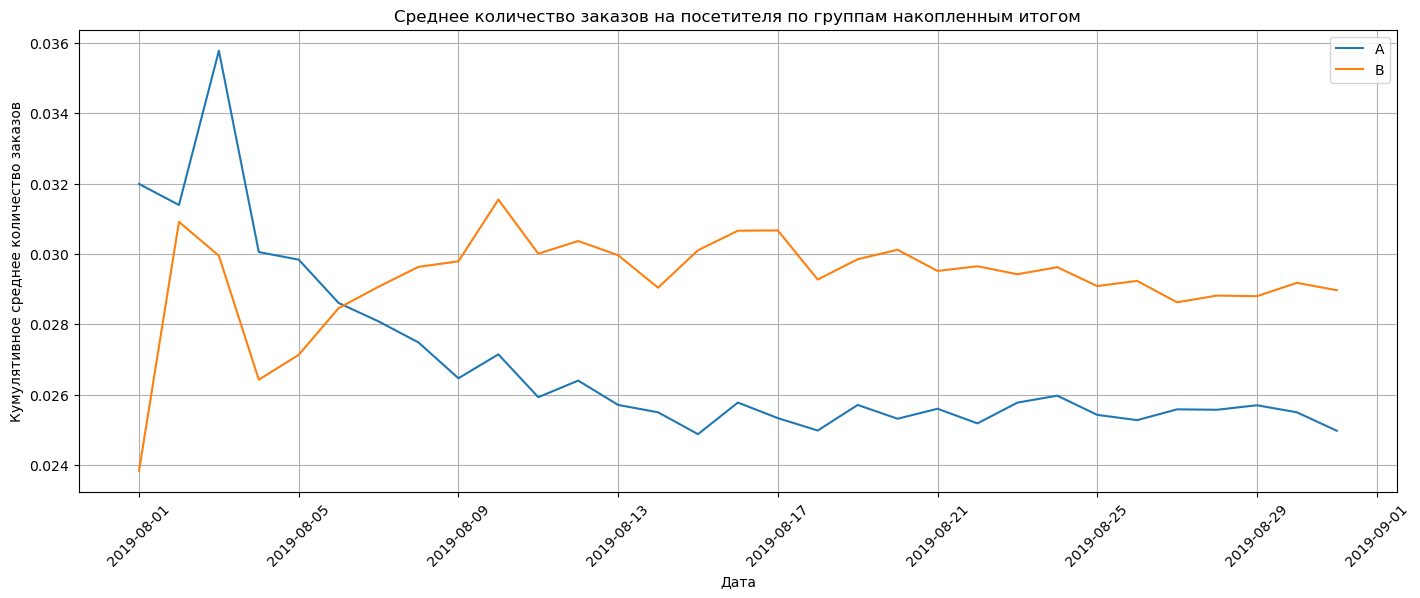

In [41]:
# Построение графика кумулятивного среднего количества заказов на посетителя
plt.figure(figsize=(17, 6))
plt.plot (day_rev_a['date'], day_rev_a['cum_ord']/day_rev_a['cum_vis'], label = 'A')
plt.plot (day_rev_b['date'], day_rev_b['cum_ord']/day_rev_b['cum_vis'], label = 'B')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Кумулятивное среднее количество заказов')
plt.title('Среднее количество заказов на посетителя по группам накопленным итогом')
plt.legend()
plt.grid(True)
plt.show()

 - Среднее количество заказов на посетителя по группам к концу теста стабилизировалось
 - Группа Б опережает группу А по среднему количеству заказов на посетителя

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.


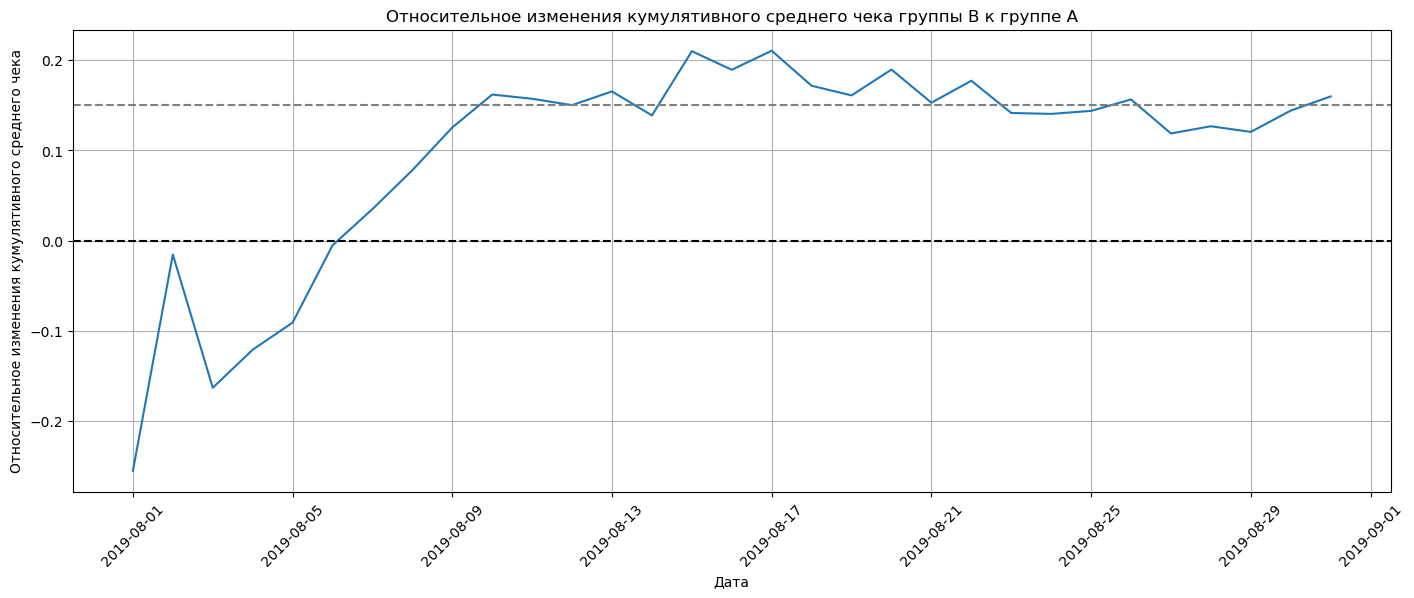

In [44]:
plt.figure(figsize=(17, 6))
plt.plot(day_rev_a['date'], ((day_rev_b['cum_ord']/day_rev_b['cum_vis'])/(day_rev_a['cum_ord']/day_rev_a['cum_vis'])-1))

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
         
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Относительное изменения кумулятивного среднего чека')
plt.title('Относительное изменения кумулятивного среднего чека группы B к группе A')
plt.grid(True)
plt.show()

 - Группа Б уже через неелю после начала теста вырвалась вперед и показывает себя на 10-20% лучше группы А по среднему количеству заказов на посетителя

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.


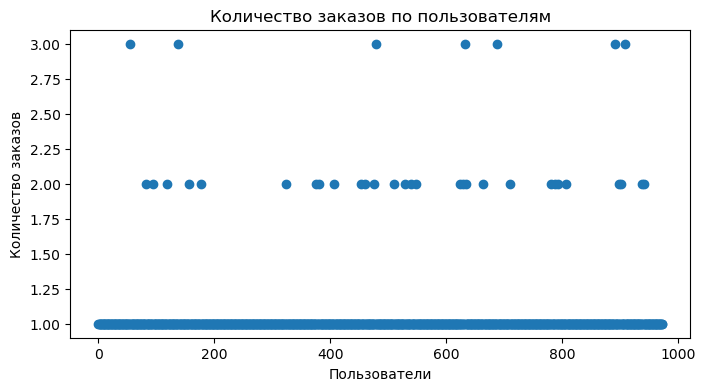

In [47]:
order_per_user = orders.groupby ('visitorId').agg({'transactionId':'count'})
x_values = pd.Series(range(0, len(order_per_user['transactionId'])))

plt.figure(figsize=(8, 4))
plt.scatter(x_values, order_per_user['transactionId'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

 - Большинство пользователей совершили 1 заказ

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.


In [50]:
for i in [90,95,99]:
    percent = 100-i
    percentile = np.percentile(order_per_user['transactionId'], i)
    print ('{0}-й перцентиль: не более {1}% пользователей совершали больше {2} заказов'.format(i,percent, round(percentile)))

90-й перцентиль: не более 10% пользователей совершали больше 1 заказов
95-й перцентиль: не более 5% пользователей совершали больше 1 заказов
99-й перцентиль: не более 1% пользователей совершали больше 2 заказов


 - Аномальные пользователи - те кто совершил более 1 заказа
 

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.


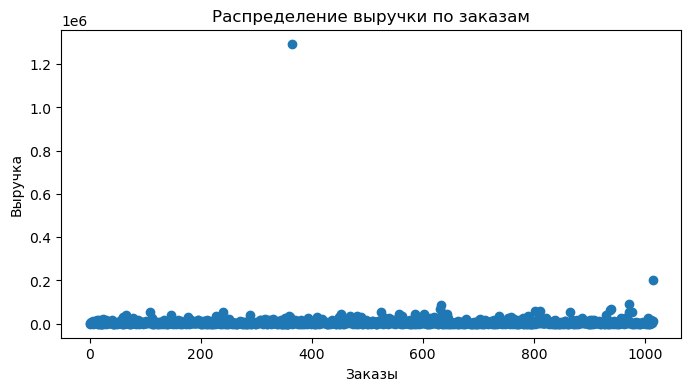

In [53]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(8, 4))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение выручки по заказам')
plt.xlabel('Заказы')
plt.ylabel('Выручка')
plt.show()

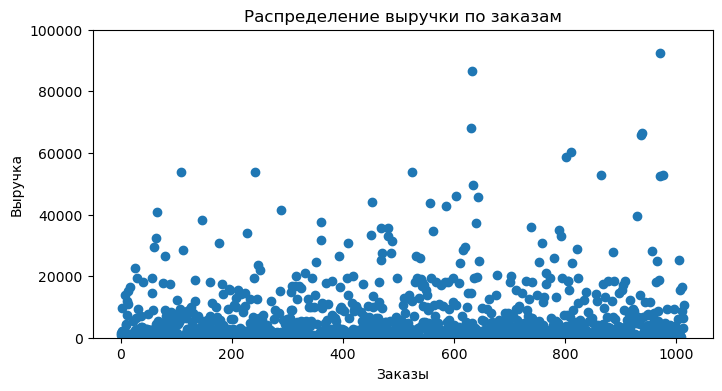

In [54]:
plt.figure(figsize=(8, 4))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)
plt.title('Распределение выручки по заказам')
plt.xlabel('Заказы')
plt.ylabel('Выручка')
plt.show()

 - Большинство заказов стоят до 40 000
 - Есть янвые аномалии (заказ стоимостью более 1.2 млн.) и выбросы в районе 60-100 тыс.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.


In [57]:
for i in [90,95,98, 99]:
    percent = 100-i
    percentile = np.percentile(orders['revenue'], i)
    print ('{0}-й перцентиль: не более {1}% заказов стоят дороже {2}'.format(i,percent, round(percentile)))

90-й перцентиль: не более 10% заказов стоят дороже 17990
95-й перцентиль: не более 5% заказов стоят дороже 26785
98-й перцентиль: не более 2% заказов стоят дороже 42353
99-й перцентиль: не более 1% заказов стоят дороже 53904


 - Аномальные заказы - дороже 42 000

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.


**- Нулевая гипотеза:** среднее количество заказов на посетителя равны в группе А и Б (по «сырым» данным)

**- Альтернативная гипотеза:** среднее количество заказов на посетителя статистически значимо различается между группами 

**- Уровень значимости alpha =** 0.05

**- Метод проверки гипотезы**:
    
    - Для проверки гипотезы будет использован критерий Манна-Уитни, так как он используется для сравнения двух независимых выборок, когда данные не обязательно распределены нормально.

In [61]:
#H0 : mean_order_per_visitor (A) = mean_order_per_visitor (B) 
#H1 : mean_order_per_visitor (A) <> mean_order_per_visitor (B) 

alpha = 0.05

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.loc[visitors['group'] =='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.loc[visitors['group'] =='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

if stats.mannwhitneyu(sampleA, sampleB)[1]< alpha :
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
        
print("P-value = {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительное изменение группы Б к А = {0:.5f}".format(sampleB.mean() / sampleA.mean() - 1))

Отвергаем нулевую гипотезу: разница статистически значима
P-value = 0.01102
Относительное изменение группы Б к А = 0.15980


 - P-value  меньше уровня значисмости alpha - 0.05, следовательно нулевую гипотезу отвергаем
 - Анализ «сырых» данных показал, что в среднем количестве заказов на посетителя между группами есть статистически значимые различия
 - Относительный прирост среднего количества заказов на посетителя группы B к конверсии группы A составляет 16%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.


**- Нулевая гипотеза:**  в группе А и Б одинаковый средний чек (по «сырым» данным)

**- Альтернативная гипотеза:** средний чек статистически значимо различается по группам 

**- Уровень значимости alpha =** 0.05

**- Метод проверки гипотезы**:
    
    - Для проверки гипотезы будет использован критерий Манна-Уитни, так как он используется для сравнения двух независимых выборок, когда данные не обязательно распределены нормально.

In [65]:
#H0 : mean_revenue (A) = mean_revenue (B) 
#H1 : mean_revenue (A) <> mean_revenue (B) 

alpha = 0.05

if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                      orders[orders['group']=='B']['revenue'])[1] < alpha :
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
        

print("P-value = {0:.5f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))

print("Относительное изменение группы Б к А = {0:.5f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
P-value = 0.82949
Относительное изменение группы Б к А = 0.28660


 - P-value больше уровня значисмости alpha - 0.05 - нулевую гипотезу не отвергаем -  статистически значимых отличий в среднем чеке между группами нет. 
 - Однако относительный прирост среднего чека между группами 28.7%

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.


 - Аномальные пользователи - те кто совершил более 1 заказов 
 - Аномальные заказлы - стоимость которых более 42 000 

In [69]:
#критерии аномалии
anomaly_vis = np.percentile(order_per_user['transactionId'], 95)
anomaly_rev = np.percentile(orders['revenue'], 98)

In [70]:
#считаем кол-во заказов на каждого посетителя
order_per_vis = orders.groupby('visitorId').agg({'transactionId':'nunique'})

#список посетителей имеющих нормальное количество покупок
norm_visitors = orders.groupby('visitorId')['transactionId'].nunique() \
                      .loc[order_per_vis['transactionId']<= anomaly_vis].reset_index()['visitorId']

In [71]:
#исключаем выбросы
orders_filtred = orders.loc[(orders['revenue'] < anomaly_rev) & 
                            (orders['visitorId'].isin(norm_visitors))]                             

**- Нулевая гипотеза:** среднее количество заказов на посетителя равны в группе А и Б (по «очищенным» данным)

**- Альтернативная гипотеза:** среднее количество заказов на посетителя статистически значимо различается между группами 

**- Уровень значимости alpha =** 0.05

**- Метод проверки гипотезы**:
    
    - Для проверки гипотезы будет использован критерий Манна-Уитни, так как он используется для сравнения двух независимых выборок, когда данные не обязательно распределены нормально.

In [73]:
#H0 : mean_order_per_visitor (A) = mean_order_per_visitor (B) 
#H1 : mean_order_per_visitor (A) <> mean_order_per_visitor (B) 

alpha = 0.05

ordersByUsersA = (
    orders_filtred[orders_filtred['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders_filtred[orders_filtred['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.loc[visitors['group'] =='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.loc[visitors['group'] =='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

if stats.mannwhitneyu(sampleA, sampleB)[1]< alpha :
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
        
print("P-value = {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительное изменение группы Б к А = {0:.5f}".format(sampleB.mean() / sampleA.mean() - 1))

Отвергаем нулевую гипотезу: разница статистически значима
P-value = 0.00467
Относительное изменение группы Б к А = 0.20341


 - После очистки данных от выбросов P-value снизился: теперь нулевая гипотеза отвергается даже при уровне значимости 0.1 
 - В среднем количестве заказов на посетителя между группами А и Б есть статистически значимые различия
 - Относительный прирост среднего количества заказов на посетителя группы B к конверсии группы A составляет 20%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


**- Нулевая гипотеза:**  в группе А и Б одинаковый средний чек (по «очищенным» данным)

**- Альтернативная гипотеза:** средний чек статистически значимо различается по группам 

**- Уровень значимости alpha =** 0.05

**- Метод проверки гипотезы**:
    
    - Для проверки гипотезы будет использован критерий Манна-Уитни, так как он используется для сравнения двух независимых выборок, когда данные не обязательно распределены нормально.

In [77]:
#H0 : mean_revenue (A) = mean_revenue (B) 
#H1 : mean_revenue (A) <> mean_revenue (B) 

alpha = 0.05

if stats.mannwhitneyu(orders_filtred[orders_filtred['group']=='A']['revenue'], 
                      orders_filtred[orders_filtred['group']=='B']['revenue'])[1] < alpha :
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
        

print("P-value = {0:.5f}".format(stats.mannwhitneyu(orders_filtred[orders_filtred['group']=='A']['revenue'], 
                                          orders_filtred[orders_filtred['group']=='B']['revenue'])[1]))

print("Относительное изменение группы Б к А = {0:.5f}".format(orders_filtred[orders_filtred['group']=='B']['revenue'].mean()/orders_filtred[orders_filtred['group']=='A']['revenue'].mean()-1))

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
P-value = 0.75776
Относительное изменение группы Б к А = 0.10077


 - Cтатистически значимых отличий в среднем чеке между группами нет.
 - Относительный прирост среднего чека между группами снизился до 10%

### Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

**Остановить тест, зафиксировать победу группы Б**

 - Между группами есть статистически значимое различие по конверсии посетителей в заказы. Относительный прирост среднего количества заказов на посетителя группы B составляет 16 % по сырым данным и 20% по очищенным данным 
 - Cтатистически значимых отличий в среднем чеке между группами нет.